<a href="https://colab.research.google.com/github/laikacuriosity/codeX_techno_01/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [46]:

df=pd.read_csv("/content/retail_sales_dataset.csv")   #storing it in a dataframe
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [47]:
df['Date']=pd.to_datetime(df['Date'])
df=df.dropna()
df=df.drop_duplicates()

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None


In [ ]:
""" ANALYSIS:
total number of rows in the dataset: 1000 (ranging from 0 to 999)
columns: 9 (ranging from 0 to 8)

total number of datatypes in the dataset: 5 numeric, 3 categorical, 1 datetime
numeric datatype:  Quantity, Age, Price per unit, Total amount, Transaction ID
categorical data: Gender, product categoy,customer ID
datetime: date

all are non null values
"""

In [7]:
ColumnsWithNumericValue=["Age", "Quantity", "Price per Unit","Total Amount"]
numeric_table=pd.DataFrame({
    "Mean": df[ColumnsWithNumericValue].mean(),
    "Mode": df[ColumnsWithNumericValue].mode().iloc[0],
    "Median": df[ColumnsWithNumericValue].median(),
    "standard_deviation":df[ColumnsWithNumericValue].std(),
    "Min": df[ColumnsWithNumericValue].min(),
    "Max": df[ColumnsWithNumericValue].max()
})
numeric_table

,Mean,Mode,Median,standard_deviation,Min,Max
Age,41.392,43.0,42.0,13.681430,18,64
Quantity,2.514,4.0,3.0,1.132734,1,4
Price per Unit,179.890,50.0,50.0,189.681356,25,500
Total Amount,456.000,50.0,135.0,559.997632,25,2000


In [ ]:
"""
therefore on average each transaction has a total amount of 456.
low spending people have a transaction below 456 and high spending people have a transaction above 456
moreover
average customer age is 41
on average, customers buy 2.5 items per transaction
average unit price of products sold is 179 rupees

INSIGHTS:
quantity: most purchases are between one to four items
price per unit varies from 25 to 500 rupees inidcating low cost products to premium
total amount; skewed by large transactions occasionally

"""

In [55]:
categorical_columns=["Gender", "Product Category"]
for col in categorical_columns:
  print(f"\n column : {col}")
  print(f"most common value(mode):", df[col].mode()[0])
  print("count of transactions per category:")
  print("\n")
  print(df[col].value_counts())
  print("\n")



 column : Gender
most common value(mode): Female
count of transactions per category:


Gender
Female    510
Male      490
Name: count, dtype: int64



 column : Product Category
most common value(mode): Clothing
count of transactions per category:


Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64




In [ ]:
"""
INSIGHTS:
gender distribution is  almost balanced but slightly tilted towards female
customers

clothing is the most purchased category but all three category are almmost
 evenly represented.

women have a slightly higher number of ttransactions of 510
as comapred to men with a transaction rate of 490
"""

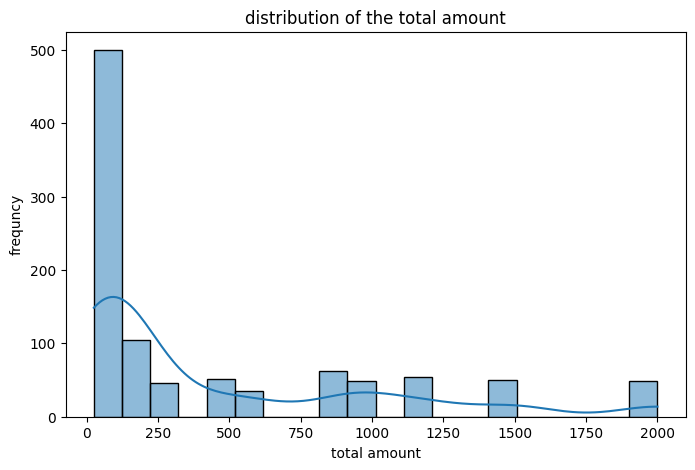

In [9]:
# performming a univariate analysis using countplot and histogram plot to understand its spread
# histplot for total amount.

plt.figure(figsize=(8,5))
sns.histplot(df['Total Amount'], bins=20, kde=True)
plt.title("distribution of the total amount")
plt.xlabel("total amount")
plt.ylabel("frequncy")
plt.show()


In [ ]:
"""
INSIGHT:
 the distribution is right-skewed ie smaller number of transactions are of high-
 value actinng as outliers although most transactions are of low to mid value
 """

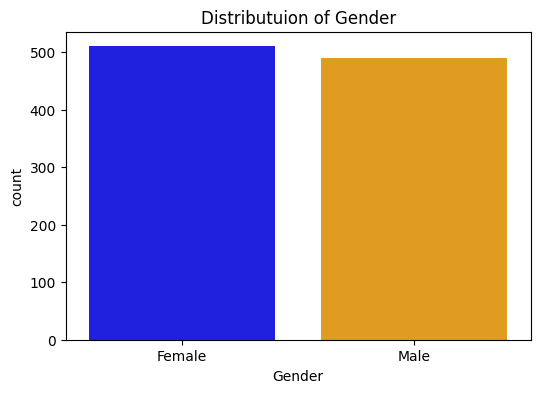

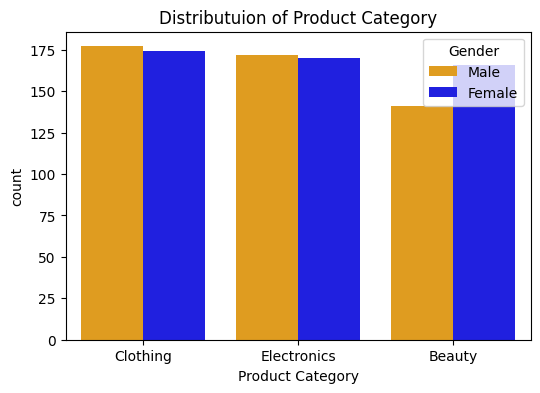

In [48]:
#count plot for gender and  product category
palette_colours={"Female": "blue", "Male":"orange"}
for col in categorical_columns:
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x=col, order=df[col].value_counts().index,hue='Gender', palette=palette_colours)
  plt.title(f"Distributuion of {col}")
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [49]:
df.groupby(['Product Category', 'Gender']).size().unstack()


Gender,Female,Male
Product Category,,
Beauty,166,141
Clothing,174,177
Electronics,170,172


In [ ]:
"""
INISGHTS:
Measuring the number of transactions for each category by each gender.

Observation:
Clothing is most purchased for both genders ,followed by electronics and beauty products.
Men have made slightly more purchaces than women for clothing, this is in contrary to common retail trends where women dominate the clothing sales
However,
Beauty products are purchased more by women than males
Electronics purcchases are almost  evenly split.

"""

In [ ]:
#bivariate analysis

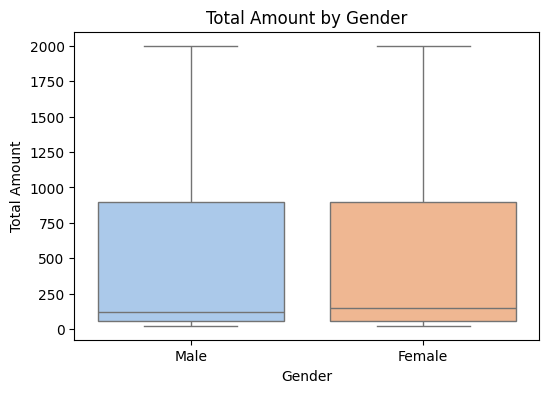

In [22]:
#relationship between the customer's gender and the total amount spent
#an attempt to disearn whether there are anny differences in spending patterns between the two genders

plt.figure(figsize=(6,4))
sns.boxplot(x='Gender',y='Total Amount',hue='Gender', data=df, palette='pastel')
plt.title("Total Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.show()


In [33]:
# Average spend per gender
print("Average Spend by Gender:")
print(df.groupby("Gender")["Total Amount"].mean())

# Total spend per gender
print("\nTotal Spend by Gender:")
print(df.groupby("Gender")["Total Amount"].sum())

Average Spend by Gender:
Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64

Total Spend by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [ ]:
"""
INSIGHTS:

The total spend is slightly higher for women, as the number of transactions is higher for women, not because of a higher
spend rate.

Therefore, we can say that gender doesnt seem to significantly influence the total
spend value

"""

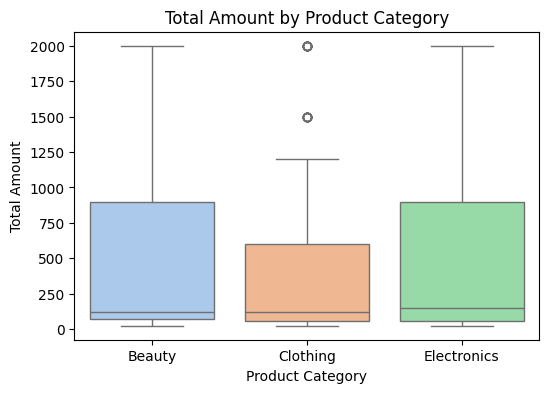

In [27]:
#total ammount spent across different product categories

plt.figure(figsize=(6,4))
sns.boxplot(x='Product Category', y='Total Amount', hue='Product Category',data=df, palette='pastel', legend=False)
plt.title("Total Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()


In [40]:
# Average spend per category
print("Average Spend by Product Category:")
print(df.groupby("Product Category")["Total Amount"].mean())

# Total spend per category
print("\nTotal Spend by Product Category:")
print(df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False))

Average Spend by Product Category:
Product Category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: Total Amount, dtype: float64

Total Spend by Product Category:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [ ]:
"""
INSIGHTS:
Beauty products have the highest average spend per transaction of around 467 rupees.
while  followed by elecronics with average spend per transaction of rupees 458.78.
and then clothing with the least average spend per transaction of around 443.24 rupees

Electronics lead the total revenue, therefore indicating that electronics have higher sales value overall despite a smaller average spend.
These higher transaction volumes make up for slightly lower spend.
Thereby resulting in higher total revenue.

"""

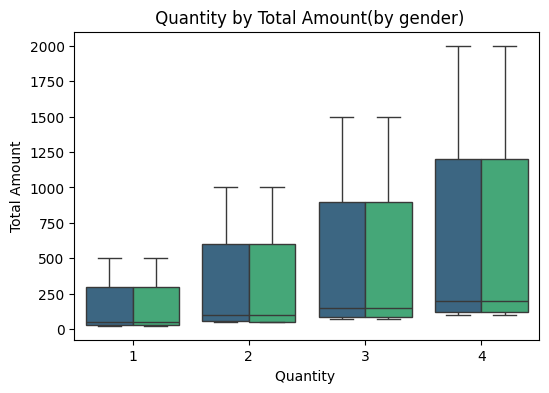

In [24]:
#total amount spent with the uantity of the items, separated by gender

plt.figure(figsize=(6,4))
sns.boxplot(x='Quantity',y='Total Amount', data=df, hue='Gender', palette='viridis', legend=True)
plt.title(" Quantity by Total Amount(by gender)")
plt.xlabel("Quantity ")
plt.ylabel("Total Amount")
plt.show()


In [ ]:
"""
Insights:
There is an increase in total amounnt with increasing quantity which is expeccted as buying more items increases the cost

The distribution for each quantity level is similar across both the genders , suggesting that the gender difference doesnt significantly impact the spending for a given quantity

Hence we can conclude that the quantity purchased is directly proportional to total amount spent.
but gender differences are negligible for the same quantity.
"""

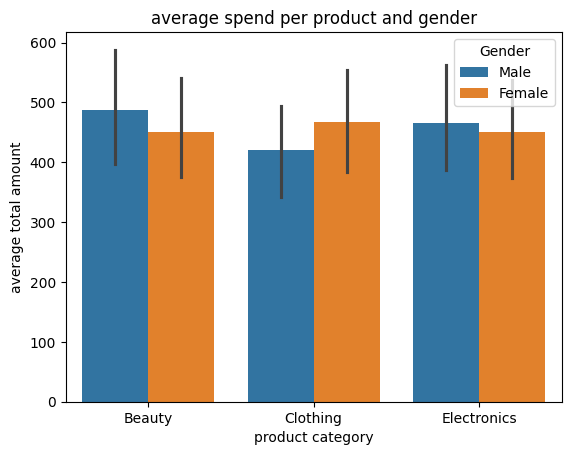

In [25]:
#avg spend per product category separated by gender

sns.barplot(data=df, x="Product Category", y="Total Amount", hue="Gender")
plt.title("average spend per product and gender")
plt.ylabel("average total amount")
plt.xlabel("product category")
plt.show()

In [56]:
# Average spend per product category by gender
avg_spend = df.groupby(["Product Category", "Gender"])["Total Amount"].mean().reset_index()

print("Average Spend per Product Category by Gender:")
print(avg_spend)


Average Spend per Product Category by Gender:
  Product Category  Gender  Total Amount
0           Beauty  Female    450.783133
1           Beauty    Male    487.127660
2         Clothing  Female    467.097701
3         Clothing    Male    419.802260
4      Electronics  Female    451.382353
5      Electronics    Male    466.104651


In [ ]:
"""
INSIGHTS:

Measuring the average amount spent per transaction by each gender in each product category.

Observations:
Beauty products- males spend 487 rupees while women spend 450 rupees on average.
Which means when males buy beauty products , they typically buy expensive ones, hence although women made more often purchases for beauty products they spent less per purchase
While male who made significantly less number of purhaCes, spent more per purchase.

"""

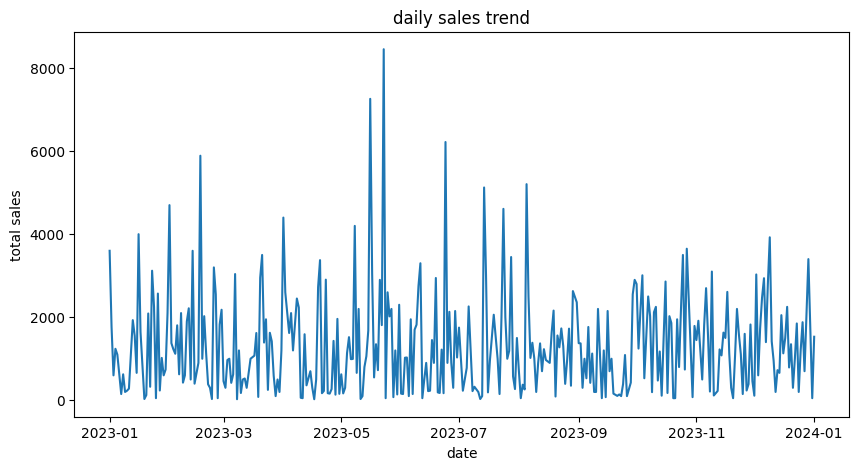

In [ ]:
#performing a time series analysis
#total sales amount for each date in the dataset

daily_sales= df.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("daily sales trend")
plt.xlabel("date")
plt.ylabel("total sales")
plt.show()

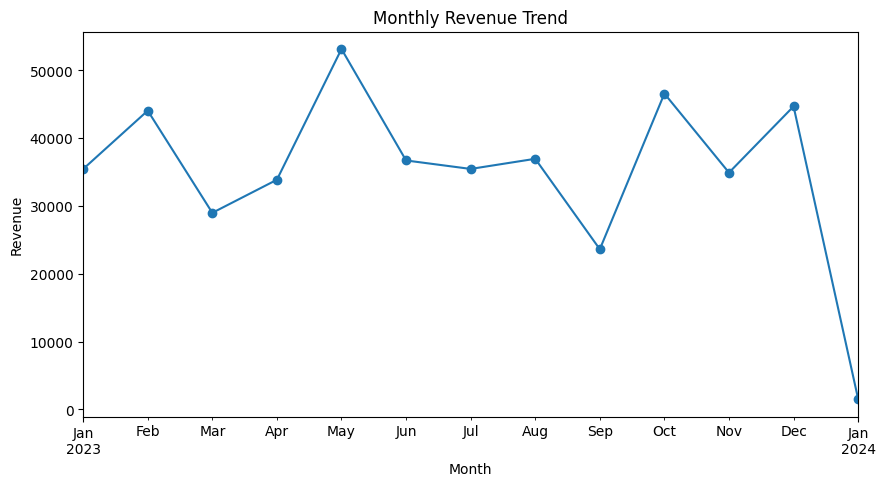

Monthly Revenue:
Date
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64


In [71]:
#monthly analysis

monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()

print("Monthly Revenue:")
print(monthly_sales)



In [ ]:
#spikes could indicate promotional events, holidays, or any other factor leading to higher sales

""" insights:

Measuring how total sales revenue changes monthly and identify any drops or peaks to disearn pattterns

Observation:
Total days recorded: 365 days, starting from 1 january 2023 to 1 january 2024
Noticeable peaks on dates like 2023-01-01(₹3200), 2023-05-16 (₹7260)  and 2023-06-24(₹6220) which indicates seasonal trends or festivals or holidays that encourage more purchasing.
The sales data peaks around mid may and late june which could  indicate towards seasonal period or festivals
Businesses can plan marketting around similar dates

Significcant low sales days have a purchase <= ₹50, inidcating possible off season or stock-outs

Monthly aggregation:
High revenue months:
Revenue has gradually increased from January to May , and has peaked in May 2023, october 2023, december 2023 , this could indicate a seasonal/festive/ssale period

Low revenue months: January 2023, March 2023, September 2023

Revenue has found to drastically drop in january 2024 indicating a possible post holiday slump.
Business can ensure sufficient stock for high demand months and plan campaigns during low revenue months like january, march and september

"""

/tmp/ipython-input-235776974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='pastel')


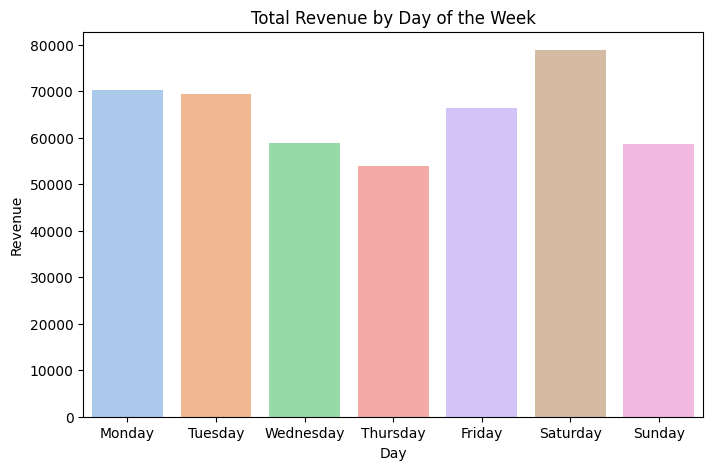

Weekly Revenue:
DayOfWeek
Monday       70250
Tuesday      69440
Wednesday    58770
Thursday     53835
Friday       66290
Saturday     78815
Sunday       58600
Name: Total Amount, dtype: int64


In [70]:
#weekly analysis

df['DayOfWeek'] = df['Date'].dt.day_name()
weekly_sales = df.groupby('DayOfWeek')['Total Amount'].sum().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(8,5))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='pastel')
plt.title("Total Revenue by Day of the Week")
plt.ylabel("Revenue")
plt.xlabel("Day")
plt.show()
print("Weekly Revenue:")
print(weekly_sales)

In [ ]:
#spikes could indicate promotional events, holidays, or any other factor leading to higher sales

""" insights:

Measuring how total sales revenue changes weekly and identify any drops or peaks to disearn pattterns.

Observation:
Saturday generates the highest revenue and thursday generates the lowest revenue.

The data also indicates a strong revenue at the start of the week which could be due to work week planning or ongoing promotion.
Highest revenue generation saturday could be due to weekend shopping habits, people having more leisure time.


Thursday with lowest revenue generation could be due to midweek slump in shopping activity or fewer promotions.

Therefore we can say weekends dominate overall revenue , especially on saturday. Marketting offers or efforts could be focused around saturday.

Thursdays could be seen as an opportunity to boost sales with targeted promotions.

"""

In [ ]:
#feature engineering: creating age group to analyze total sales

total sales by age group
Age Group
teens           11215
young adult    171815
adult          139660
senior         133310
Name: Total Amount, dtype: int64




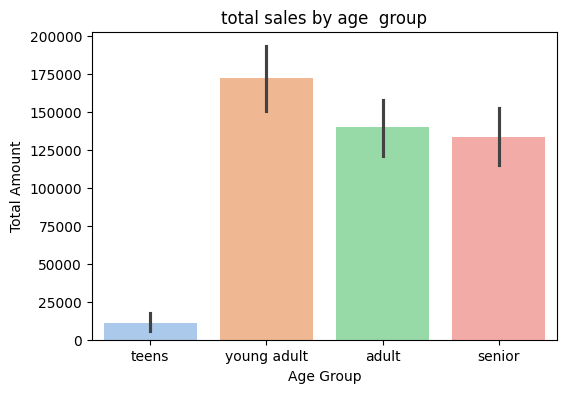

Total Sales by Age Group and Product Category:
Product Category  Beauty  Clothing  Electronics
Age Group                                      
teens               4960      4085         2170
young adult        57560     62400        51855
adult              49110     42975        47575
senior             31885     46120        55305


/tmp/ipython-input-2192294269.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product_sales = df.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()


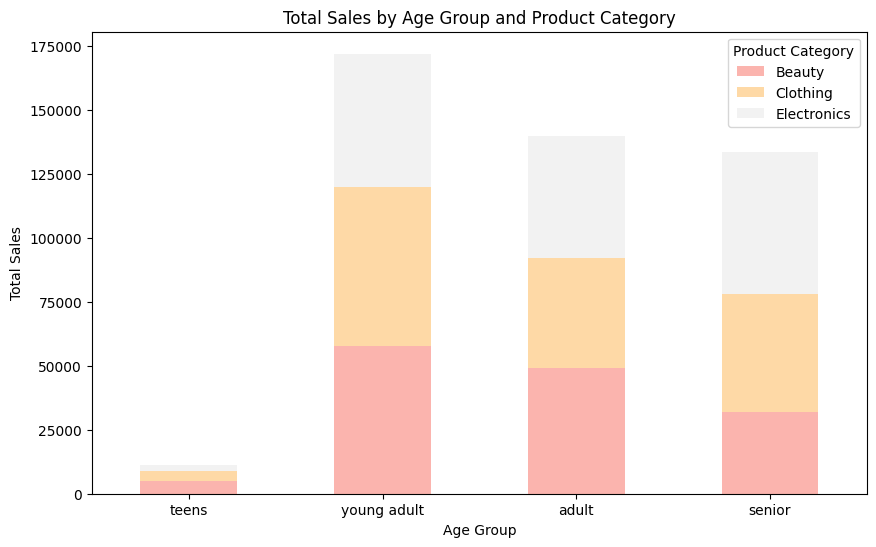

In [79]:
df['Age Group']= pd.cut(df['Age'],bins=[0,18,35,50,100], labels=["teens","young adult", "adult" ,"senior"])
print("total sales by age group")
print(df.groupby('Age Group', observed=True)['Total Amount'].sum())
print("\n")

plt.figure(figsize=(6,4))
sns.barplot(x="Age Group", y="Total Amount",hue='Age Group', data=df, estimator=sum, palette='pastel')
plt.title("total sales by age  group")
plt.show()




Total Sales by Age Group and Product Category:
Product Category  Beauty  Clothing  Electronics
Age Group                                      
teens               4960      4085         2170
young adult        57560     62400        51855
adult              49110     42975        47575
senior             31885     46120        55305




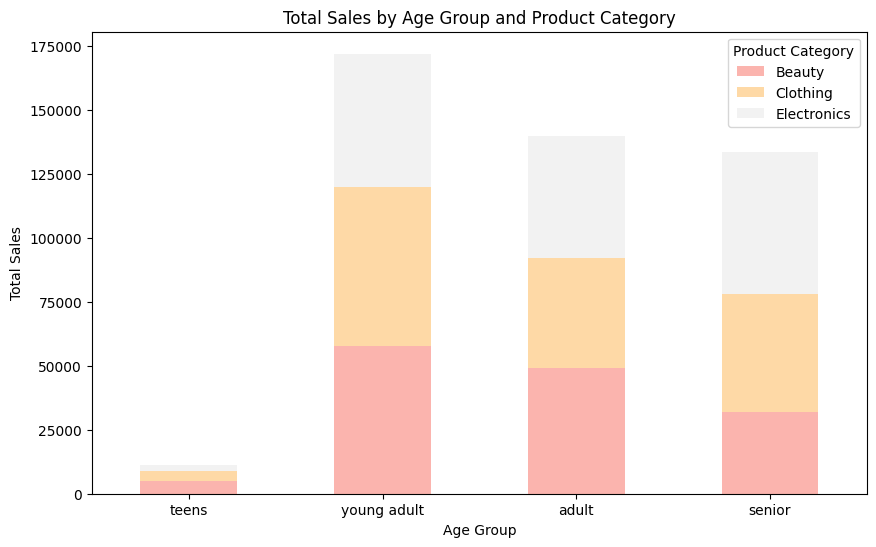

In [83]:
age_product_sales = df.groupby(['Age Group', 'Product Category'], observed=True)['Total Amount'].sum().unstack()
print("Total Sales by Age Group and Product Category:")
print(age_product_sales)

age_product_sales.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Pastel1')
plt.title("Total Sales by Age Group and Product Category")
print("\n")

plt.xlabel("Age Group")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.legend(title="Product Category")
plt.show()

In [ ]:
"""
insights:

young adults(19-35) are the largest revenue contributors so far
adults and seniors are also significant contributors
teens show minimal contributions, as expected.

young adults are biggest spenders overall, especially in clothing
while seniors are biggest spenders in electronic product although young adults still remain the biggest contributors 'overall'


Young adults should be the key target for promotions.
Adults and Seniors can be targeted with premium products.
Teens can be influenced by family purchasing or sales since their individual spending is significantly low.

"""

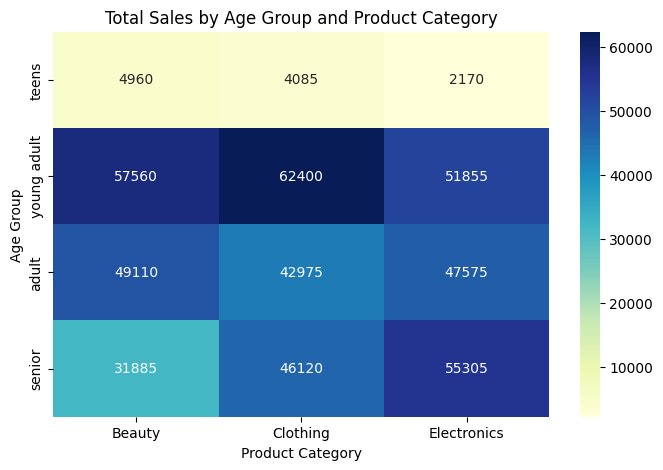

In [84]:
#heatmap for the above data:

age_product_sales = pd.DataFrame({
    "Beauty": [4960, 57560, 49110, 31885],
    "Clothing": [4085, 62400, 42975, 46120],
    "Electronics": [2170, 51855, 47575, 55305]
}, index=["teens", "young adult", "adult", "senior"])

# Plotting the heatmap
plt.figure(figsize=(8,5))
sns.heatmap(age_product_sales, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Total Sales by Age Group and Product Category")
plt.ylabel("Age Group")
plt.xlabel("Product Category")
plt.show()


In [ ]:
"""
the data clearly represents higher revenue generation by young adults, especially when it comes to clothing and beauty products
although seniors are biggest spenders in electronic products, young adults remain the biggest spenders overall
teens spend minimally and seem to focus on significantly low value electronic purchases

"""

In [ ]:
"""
EXPLORATORY DATA ANALYSIS REPORT:

1. DATASET OVERVIEW:
total rows:1000
total columns:9
missing values: none
duplicates: none
consistency: all categorical values appear consistent


1.2 DATA TYPES:
numeric: quantity, age, Transaction ID, price per unit,total amount
datetime: date
categorical: gender, product category, customer ID

1.3 BASIC STATISTICS:
average transaction amount:₹456
average customer age: 41
average items per transactions: 2.5
average unit price per products sold: 179

2.VARIABLE EXPLORATION

2.1 UNIVARIATE ANALYSIS:
Quantity: most purchases are  between 1-4 items
Price per unit: varies from rupees 25 to rupees 500
Total amount: the total amount is right skewed due to occasional high value transactions

Gender Distribution: females(510) and males(490). slightly more females

Product Category distribution:
Clothing is the most purhased item.
Electronics and beauty products are evenly purchased.

Age Group distribution:
Teens generate minimal revenue
Young Adults remain the leading revenue generators overall
Adults and Seniors also contibute signifiantly.

2.2 variable Relationships:

Gender vs Product Category:
Clothing is most purchased by men while women dominate beauty products.
Electroics purchases are almost evenly split across both gendres

Total spend by either Genders:
Women spend slightly more due to more transactions. (Beauty	166 transactions	,Clothing	174 transactions,Electronics	170 transactions)

Average spend per product category:
Beauty products have higher average spend per transaction of rupees 467.47, although elecrtonics leads the total revenue due to higher transaction volume despite its lower average spend.

Relationship observed between Quantity and Total Amount:
Quantity is directly proportional to total amount spent
Negligible differences between gender for same quantity.

Relationship between Age group and Product category:

Young Adults dominate the clothing and beauty revenue while Seniors dominate the electronics spend per person,
but Young Adults remain biggest revenue generators overall.

3. DATA VISUALIZATION:

Histograms were used for quantity, total amount, price per unit.
Box plots were used for modelling relationship between total amount and gender
Bar charts were used to plot:
      Transactions by product category and gender.
      Total sales by age group.
Heatmaps were used to visualize correlation matrix between numerical variables.


4. SUMMARY AND INSIGHTS:

4.1 Key Findings:

 1. Transaction patterns:   Most transactions were low to mid value.
                            Few high value transactions pulled the average higher, disproportionately, making the overall figures larger than what most transactions actually represent.
 2. gender analysis:    Females have slightly more transactions.
                        Males spend more per transaction in some categories.
 3. product insights:   clothing dominates the volume while electronics dominates the revenue.
                        beauty products have highest average spend per transaction.
 4. Age insights:       young adults are leading revenue generators, especially in clothing and beauty
 5. Time insights:    Monthly peaks: May , October, December 2023.
                      Weekly peaks: Saturday, followed by Mondays and Tuesdays.
                      Highest sales on specific dates indicating holidays or promotions.

4.2 RECOMMENNDATIONS:

Business can target young adults with promotion in clothing and beauty.
Focus on promoting premium electronic products for seniors.
Plan marketing campaigns around high revenue months. Targeted promotions or marketting efforts on low revenue months and weekdays to boost sales.
Leverage weekend promotions, especially on Saturdays to maximize revenue.
